In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [3]:
df = pd.read_csv("Advertising.csv")
df.drop(columns=df.columns[0], axis=1, inplace=True)

# EDA

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Finding Categorial Columns

In [7]:
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(df)
categorical_features

[]

# Correlation Matrix

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

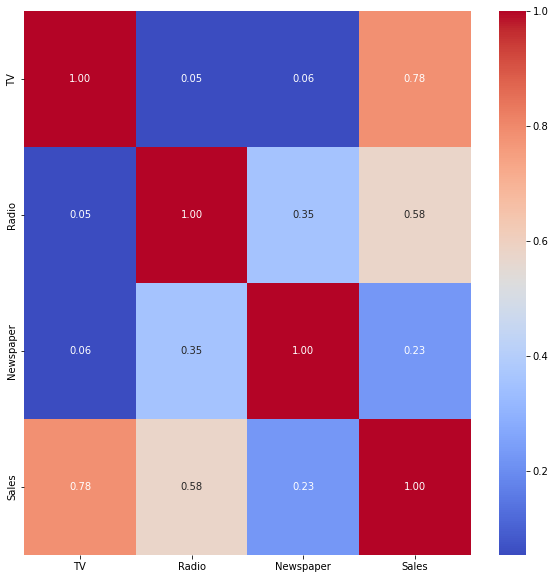

In [8]:
correlation_matrix=df.drop(columns=categorical_features).corr()
correlation_matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

# Univariate Analysis

<Axes: >

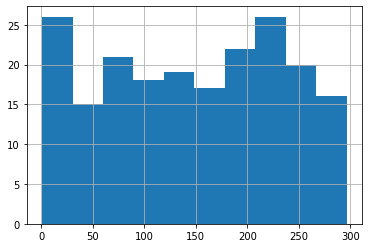

In [10]:
df['TV'].hist()

<Axes: >

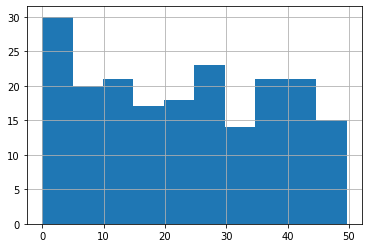

In [11]:
df['Radio'].hist()

<Axes: >

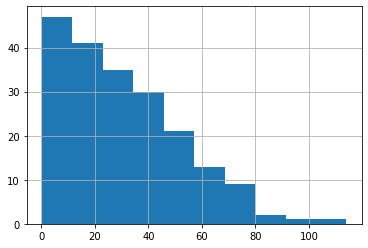

In [12]:
df['Newspaper'].hist()

In [13]:
X = df[['TV','Radio','Newspaper']]
y = df['Sales']

# Bivariate Analysis

<Axes: xlabel='TV', ylabel='Sales'>

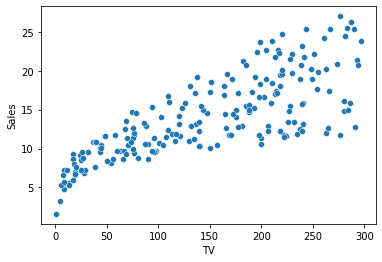

In [15]:
sns.scatterplot(x=df['TV'],y=df["Sales"])

<Axes: xlabel='Radio', ylabel='Sales'>

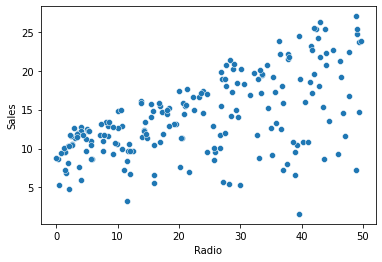

In [16]:
sns.scatterplot(x=df["Radio"],y=df["Sales"])

<Axes: xlabel='Newspaper', ylabel='Sales'>

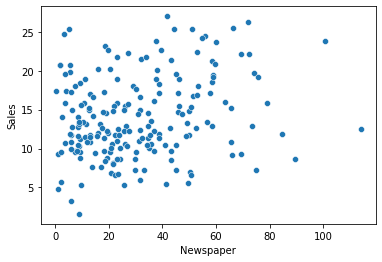

In [17]:
sns.scatterplot(x=df['Newspaper'],y=df["Sales"])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3,test_size=0.25)

# Applying Different Regressors

In [19]:
root_mean_squared_error=[]
r2=[]
model_names=[]

In [20]:
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
et = ExtraTreesRegressor(random_state=42)
lr = LinearRegression()
las = Lasso()
rid = Ridge()
models = [rf,gb,et,lr,las,rid]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    root_mean_squared_error.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2.append(r2_score(y_test, y_pred))
   
    
model_names = ['RandomForest','GradientBoost','ExtraTree','Linear','Lasso',"Ridge"]
result_df = pd.DataFrame({'RMSE':root_mean_squared_error,'R2_score': r2},index=model_names)
result_df

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,RMSE,R2_score
RandomForest,1.058193,0.965832
GradientBoost,1.063705,0.965475
ExtraTree,0.873873,0.976698
Linear,1.958932,0.882908
Lasso,1.960433,0.882728
Ridge,1.958936,0.882907


Hence, ExtraTreeRegressor gives us the highest accuracy !

In [21]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [22]:
et.fit(X_train, y_train)

ExtraTreesRegressor(random_state=42)

In [23]:
et.predict([[230.10,37.80,69.20]])

array([22.1])

In [24]:
et.predict([[45.5,39.3,45.1]])

array([10.546])

Pretty Close!